# Exercici 1

## Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

## També adjunt trobaràs una descripció de les diferents variables del dataset.

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")

> En un vistazo previo al fichero de datos, podemos ver que los datos no tienen encabezados, por lo que cargamos los datos y asignamos las columnas en el orden que vienen relacionadas en la descripción del dataset.

In [2]:
# Cargamos los datos del archivo en un Dataframe y asignamos nombre a las columnas.
df_housing = pd.read_csv('housing data.csv', header=None)
df_housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
df_housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [4]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
# Vemos los valores únicos de cada uno de los atributos
df_housing.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [6]:
df_housing.shape

(506, 14)

In [7]:
# Comprobamos si hay campos con valor núlo
df_housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
#Comprobamos si hay campos con valor NaN
df_housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df_housing.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


> De los datos obtenidos con la función _nunique()_ y con _describe()_ podemos ver que tenemos un atributo binario (CHAS) y otro atributo que sólo tiene 9 valores (**RAD**), por lo que se pueden considerar atributos categóricos y cambiarles el tipo para que no aparezcan en los cálculos estadísticos.

In [10]:
df_housing[['CHAS']].value_counts()

CHAS
0       471
1        35
dtype: int64

In [11]:
df_housing[['RAD']].value_counts()

RAD
24     132
5      115
4      110
3       38
6       26
2       24
8       24
1       20
7       17
dtype: int64

In [12]:
df_housing[['CHAS', 'RAD']] = df_housing[['CHAS', 'RAD']].astype('category')
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


> Información de los campos y descripción de los valores más carácterísticos:

  * **CRIM**: tasa de criminalidad per cápita por ciudad.
  * **ZN**: proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.
  * **INDUS**: proporción de acres de negocios no minoristas por ciudad.
  * **CHAS**: variable ficticia de Charles River (= 1 si la zona limita con el río; 0 en caso contrario).
  * **NOX**: concentración de óxidos nítricos (partes por 10 millones).
  * **RM**: número promedio de habitaciones por vivienda.
  * **AGE**: proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
  * **DIS**: distancias ponderadas a cinco centros de empleo en Boston.
  * **RAD**: índice de accesibilidad a autopistas radiales.
  * **TAX**: tasa de impuesto a la propiedad de valor total por cada 10,000 dólares.
  * **PTRATIO**: relación alumno-maestro por ciudad.
  * **B**: 1000(Bk - 0.63)^2 donde Bk es la proporción de población afroamericana por ciudad.
  * **LSTAT**: % de estatus socioeconómico bajo de la población.
  * **MEDV**: valor mediano de viviendas ocupadas por sus propietarios en miles de dólares.
  
> Todos los atributos corresponden a variables independientes y podemos afirmar que nuestra variable objetivo es la variable **MEDV**.
  

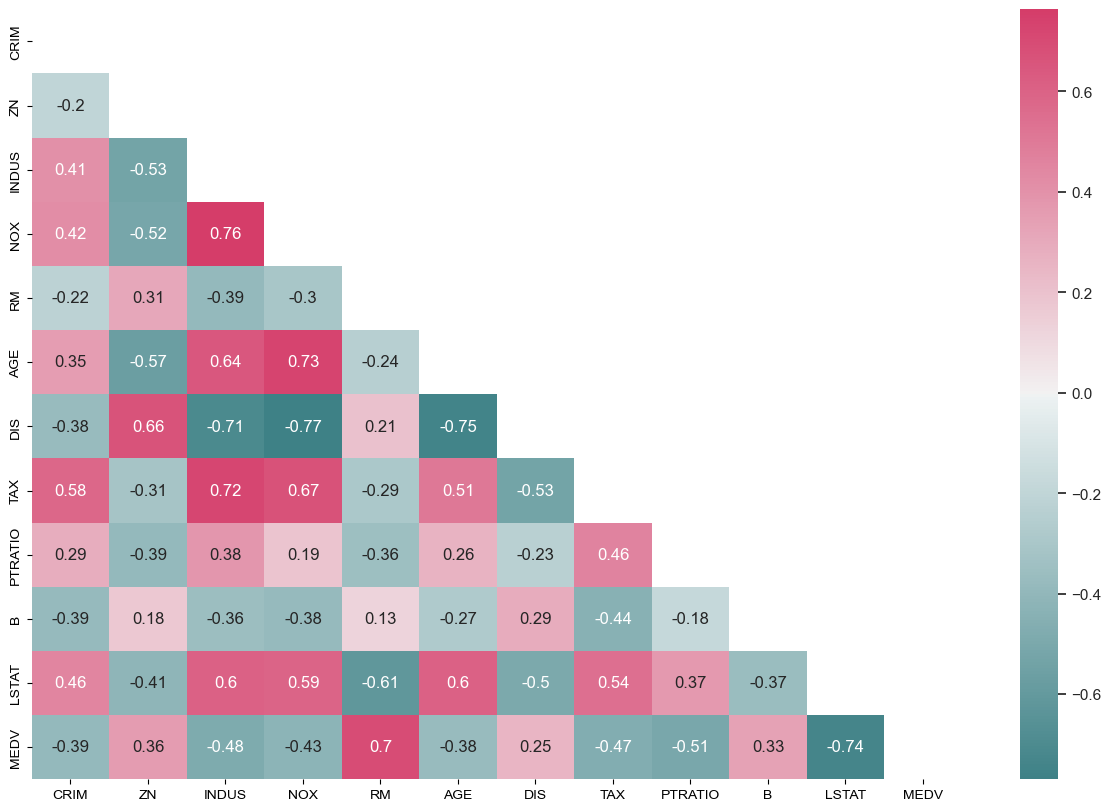

In [13]:
# Comprobamos mediante un heatmap las correlaciones entre los atributos
fig, ax = plt.subplots(figsize=(15, 10))
corr = df_housing.corr()
sns.set_theme(style="darkgrid")
cmap = sns.diverging_palette(200, 0, as_cmap=True)
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap=cmap)
plt.show()

> Tenemos una correlación positiva fuerte entre las variables **NOX**(concentración de óxidos nítricos (partes por 10 millones)) e **INDUS**(proporción de acres de negocios no minoristas por ciudad) que nos indica que las zonas donde existen negocios no minoristas aparentemente están más contaminadas.
> Tambien tenemos una correlación positiva entre las variables **AGE**(proporción de unidades ocupadas por sus propietarios construidas antes de 1940) y **NOX** que también parece indicar una relación entre la antigüedad de las viviendas y la contaminación de la zona.


> Sacamos las gráficas de distribución y Box Plot para comprobar la densidad, la situcación de medias y outliers de cada atributo.

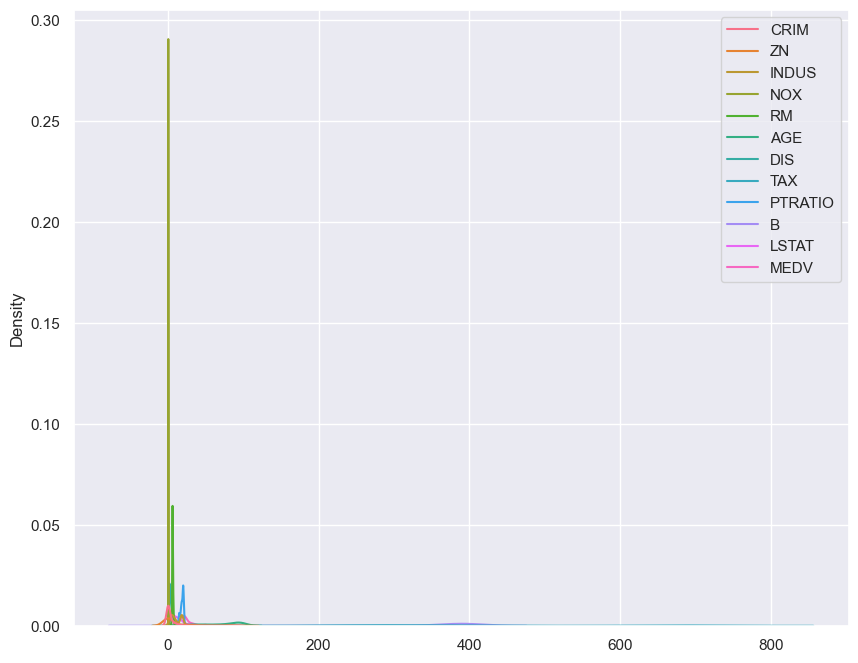

In [14]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.kdeplot(data=df_housing)

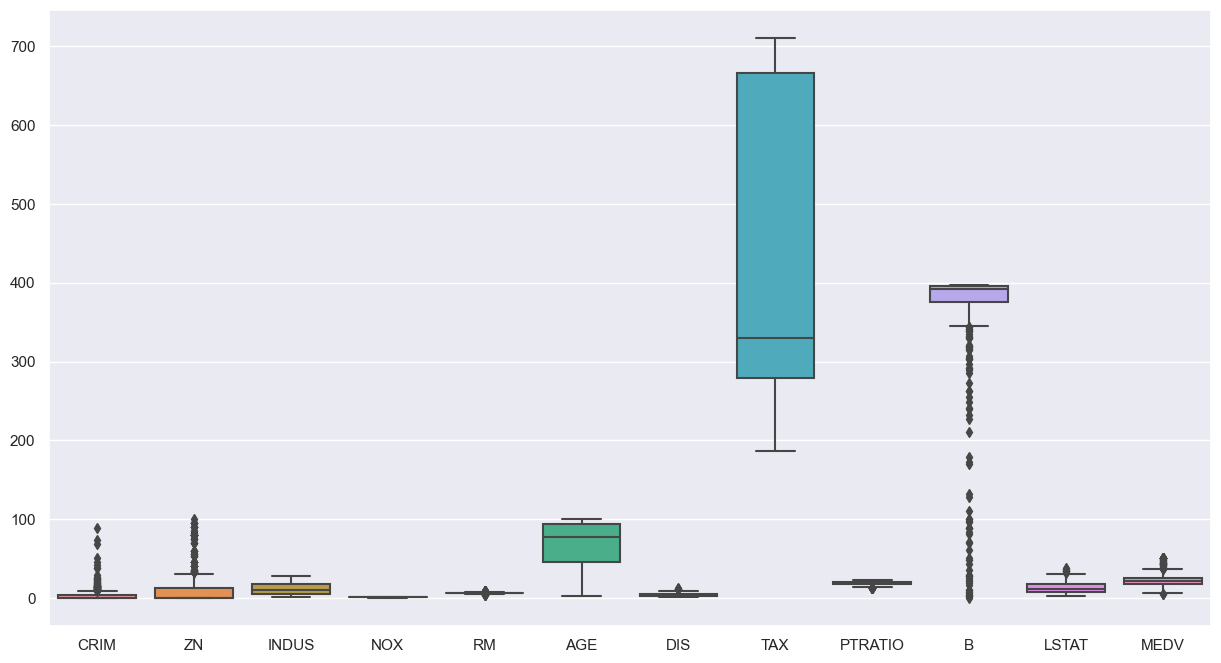

In [15]:
sns.set()
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.boxplot(data=df_housing)

> Partimos el conjunto de datos en train y test, de manera que un 80% sea para el entrenamiento y un 20% para el test.

In [35]:
X = df_housing.drop(['MEDV'],axis=1)
y = df_housing['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(len(X_train))
print(len(y_test))

404
102


>  Analizamos los principales datos estadísticos de ambos conjuntos y los comparamos con los del dataset completo.

In [17]:
X_train.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.50,8.25,0.01,0.09,0.25,3.59,88.98
ZN,404.0,11.74,23.89,0.00,0.00,0.00,13.75,100.00
INDUS,404.0,11.09,6.99,0.46,5.13,8.56,18.10,27.74
NOX,404.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,404.0,6.27,0.71,3.56,5.87,6.18,6.62,8.78
AGE,404.0,68.49,27.71,6.20,45.78,76.50,93.65,100.00
DIS,404.0,3.83,2.16,1.13,2.10,3.21,5.23,12.13
TAX,404.0,408.02,168.97,187.00,278.50,334.00,666.00,711.00
PTRATIO,404.0,18.50,2.20,12.60,17.40,19.10,20.20,22.00
B,404.0,361.22,83.81,0.32,376.67,391.38,396.08,396.90


In [18]:
X_test.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,102.0,4.06,9.92,0.03,0.07,0.32,3.82,73.53
ZN,102.0,9.89,20.97,0.00,0.00,0.00,0.00,95.00
INDUS,102.0,11.32,6.35,1.25,5.91,9.90,18.10,27.74
NOX,102.0,0.56,0.12,0.40,0.45,0.54,0.65,0.87
RM,102.0,6.33,0.69,4.14,5.99,6.28,6.63,8.72
AGE,102.0,68.90,29.96,2.90,41.40,80.00,94.92,100.00
DIS,102.0,3.66,1.86,1.18,2.11,3.17,4.94,8.91
TAX,102.0,409.08,167.64,193.00,287.00,309.00,666.00,711.00
PTRATIO,102.0,18.29,2.01,13.00,16.82,18.50,20.20,21.20
B,102.0,338.65,115.06,2.60,363.65,392.04,396.78,396.90


Text(0.5, 1.0, 'X_test')

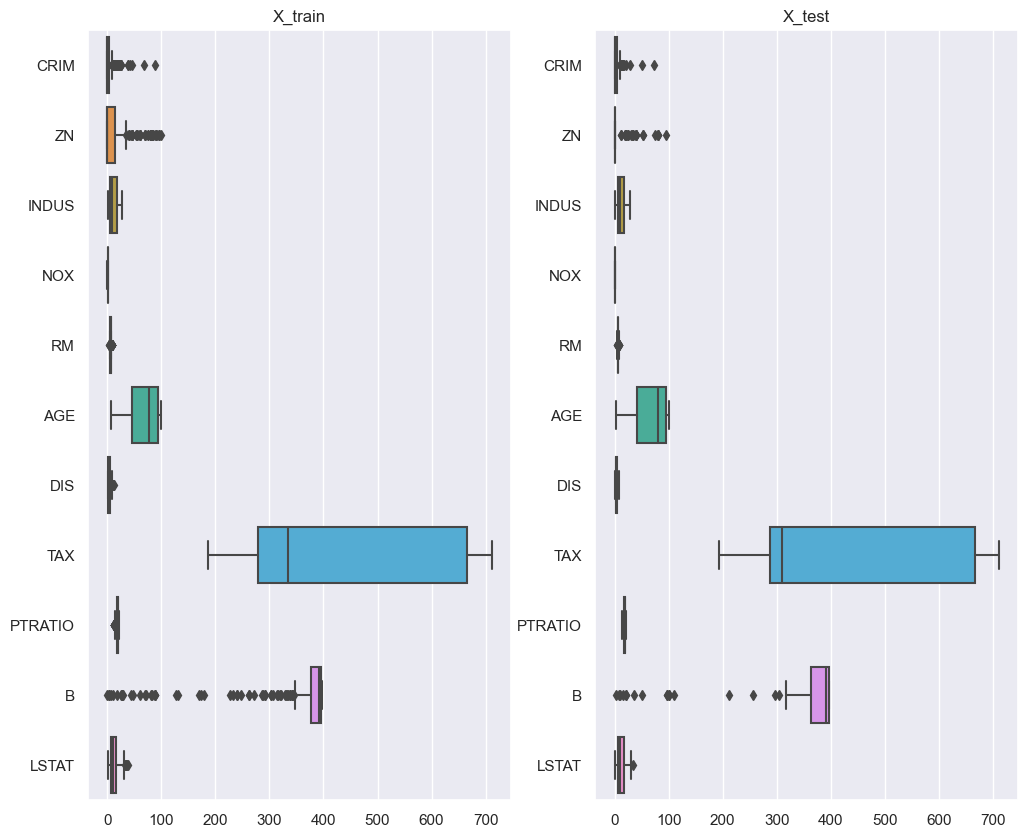

In [21]:
fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(1,2,1)
sns.boxplot(X_train, ax=ax1, orient = "h")
plt.title('X_train')

ax2 = fig.add_subplot(1,2,2)
sns.boxplot(X_test,ax=ax2, orient = "h")
plt.title('X_test')

> Tenemos outliers en alguna de las variables, pero destacan los existentes en la variable **B**

> Comprobamos mediante shapiro si las variables en _X_train_ y _X_test_ tienen una distribución gaussiana

In [22]:
for i in X_train:
    
    stat, p = shapiro(X_train[i])
    print('stat=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
         print(f'La variable {i} siguen una distribución normal. No se rechaza H0.\n')
    else: 
         print(f'La variable {i} NO siguen una distribución normal. Se rechaza H0.\n')

stat=0.455, p=0.000
La variable CRIM NO siguen una distribución normal. Se rechaza H0.

stat=0.559, p=0.000
La variable ZN NO siguen una distribución normal. Se rechaza H0.

stat=0.899, p=0.000
La variable INDUS NO siguen una distribución normal. Se rechaza H0.

stat=0.263, p=0.000
La variable CHAS NO siguen una distribución normal. Se rechaza H0.

stat=0.937, p=0.000
La variable NOX NO siguen una distribución normal. Se rechaza H0.

stat=0.964, p=0.000
La variable RM NO siguen una distribución normal. Se rechaza H0.

stat=0.898, p=0.000
La variable AGE NO siguen una distribución normal. Se rechaza H0.

stat=0.900, p=0.000
La variable DIS NO siguen una distribución normal. Se rechaza H0.

stat=0.681, p=0.000
La variable RAD NO siguen una distribución normal. Se rechaza H0.

stat=0.822, p=0.000
La variable TAX NO siguen una distribución normal. Se rechaza H0.

stat=0.895, p=0.000
La variable PTRATIO NO siguen una distribución normal. Se rechaza H0.

stat=0.457, p=0.000
La variable B NO 

In [23]:
for i in X_test:
    
    stat, p = shapiro(X_test[i])
    print('stat=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
         print(f'La variable {i} siguen una distribución normal. No se rechaza H0.\n')
    else: 
         print(f'La variable {i} NO siguen una distribución normal. Se rechaza H0.\n')

stat=0.441, p=0.000
La variable CRIM NO siguen una distribución normal. Se rechaza H0.

stat=0.545, p=0.000
La variable ZN NO siguen una distribución normal. Se rechaza H0.

stat=0.895, p=0.000
La variable INDUS NO siguen una distribución normal. Se rechaza H0.

stat=0.319, p=0.000
La variable CHAS NO siguen una distribución normal. Se rechaza H0.

stat=0.925, p=0.000
La variable NOX NO siguen una distribución normal. Se rechaza H0.

stat=0.939, p=0.000
La variable RM NO siguen una distribución normal. Se rechaza H0.

stat=0.863, p=0.000
La variable AGE NO siguen una distribución normal. Se rechaza H0.

stat=0.917, p=0.000
La variable DIS NO siguen una distribución normal. Se rechaza H0.

stat=0.671, p=0.000
La variable RAD NO siguen una distribución normal. Se rechaza H0.

stat=0.779, p=0.000
La variable TAX NO siguen una distribución normal. Se rechaza H0.

stat=0.926, p=0.000
La variable PTRATIO NO siguen una distribución normal. Se rechaza H0.

stat=0.548, p=0.000
La variable B NO 

# Exercici 2

## Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

> Utilizaremos la variable categórica **RAD** para crear columnas dummies mediante **OneHotEncoder**. La otra variable categórica **CHAS** es una variable binaria, por lo que no es necesario el paso por **OneHotEncoder**.

In [36]:
# Creamos la instancia de OneHotEncoder
encoder = OneHotEncoder()

# Ajustar (fit) el encoder a los datos de entrenamiento
encoder.fit(X_train[['CHAS','RAD']])

# Transformar los datos de entrenamiento
transformed_train = encoder.transform(X_train[['CHAS','RAD']]).toarray()

# Guardamos en un array las etiquetas de las nuevas columnas
feat_lb = ['CHAS','CHAS1','RAD1', 'RAD2', 'RAD3', 'RAD4', 'RAD5', 'RAD6', 'RAD7', 'RAD8', 'RAD24' ]

# Creamos un nuevo DataFrame
X_train_trans_oh = pd.DataFrame(transformed_train, columns = feat_lb)

X_train_trans_oh.head()

,CHAS,CHAS1,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8,RAD24
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


> Podemos eliminar las columnas **CHAS1** y **RAD24** ya que al ser valores binários, ya tenemos la información completa con el resto de columnas.

In [37]:
X_train_trans_oh.drop(['CHAS1','RAD24'],axis=1, inplace= True)
X_train_trans_oh.head()

,CHAS,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


> Realizamos el mismo proceso al X_test

In [38]:
# Utilizamos el encoder para transformar los datos de test
transformed_test = encoder.transform(X_test[['CHAS','RAD']]).toarray()

# Creamos un nuevo DataFrame
X_test_trans_oh = pd.DataFrame(transformed_test , columns = feat_lb)

X_test_trans_oh.drop(['CHAS1','RAD24'],axis=1, inplace= True)

X_test_trans_oh.head()

,CHAS,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> Cómo segundo paso trabajamos sobre las variables que tienen outliers para aplicar una estandarización y elegimos el método _RobustScaler_. 

In [39]:
# Crear una instancia de RobustScaler
scaler = RobustScaler()

# Creamos la variable que contenga las etiquetas de las columnas
feat_lb = ['CRIM', 'ZN','RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

# Ajustar (fit) el scaler a los datos de entrenamiento
scaler.fit(X_train[feat_lb])

# Transformar los datos de entrenamiento
transformed_train = scaler.transform(X_train[feat_lb])


# Creamos un nuevo DataFrame
X_train_trans_rb = pd.DataFrame(transformed_train, columns=feat_lb)

X_train_trans_rb.head()

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT
0,0.201477,0.000000,-0.623885,-0.299888,0.68750,-6.315159,0.600552
1,-0.026566,0.000000,0.360329,-0.271863,0.59375,0.163081,0.094401
2,-0.019460,1.351351,-0.091283,1.463772,0.21875,-0.059902,-0.448908
3,-0.048769,0.000000,-0.092656,0.837745,-0.65625,-1.141076,-0.224956
4,-0.048726,0.000000,-0.444063,-0.052825,-0.81250,0.043765,0.218930


In [40]:
# Transformar los datos de entrenamiento
transformed_test = scaler.transform(X_test[feat_lb])

# Creamos un nuevo DataFrame
X_test_trans_rb = pd.DataFrame(transformed_test , columns=feat_lb)

X_test_trans_rb.head()

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT
0,-0.009401,0.000000,0.301304,0.690139,0.1875,0.086797,-0.627668
1,-0.051439,1.351351,-0.061084,0.685237,0.0000,-0.061858,-0.383630
2,0.149862,0.000000,-0.304049,0.316690,0.6250,-0.252078,0.335426
3,3.114997,0.000000,0.840769,-0.477905,0.3750,-16.794866,1.145870
4,2.001796,0.000000,-0.637612,-0.529698,0.3750,0.058435,0.862666


> Cómo última modificación, aplicamos un escalado al resto de variables utilizando _MinMaxScaler_

In [41]:
# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Creamos la variable que contenga las etiquetas de las columnas
feat_lb = ['INDUS', 'NOX', 'AGE', 'TAX']

# Ajustar (fit) el scaler a los datos de entrenamiento
scaler.fit(X_train[feat_lb])

# Transformar los datos de entrenamiento
transformed_train = scaler.transform(X_train[feat_lb])


# Creamos un nuevo DataFrame
X_train_trans_mm = pd.DataFrame(transformed_train, columns=feat_lb)

X_train_trans_mm.head()

,INDUS,NOX,AGE,TAX
0,0.785557,0.491770,0.982888,0.477099
1,0.296921,0.277778,0.968984,0.375954
2,0.171188,0.139918,0.242781,0.185115
3,0.101906,0.154321,0.274866,0.463740
4,0.492302,0.339506,0.529412,0.169847


In [42]:
# Transformar los datos de entrenamiento
transformed_test = scaler.transform(X_test[feat_lb])

# Creamos un nuevo DataFrame
X_test_trans_mm = pd.DataFrame(transformed_test , columns=feat_lb)

X_test_trans_mm.head()

,INDUS,NOX,AGE,TAX
0,0.253666,0.222222,0.087701,0.190840
1,0.161290,0.084362,0.429947,0.179389
2,0.281525,0.314815,0.804278,0.229008
3,0.646628,0.685185,0.748663,0.914122
4,0.646628,0.633745,0.988235,0.914122


> Actualizamos los datasets finales con las nuevas columnas obtenidas de la estandarización.

In [45]:
# Concatenamos las nuevas columnas en el DataFrame _X_train_final_

X_train_final = pd.concat([X_train_trans_rb, X_train_trans_mm, X_train_trans_oh], axis=1)
X_train_final.head()

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,INDUS,NOX,AGE,TAX,CHAS,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8
0,0.201477,0.000000,-0.623885,-0.299888,0.68750,-6.315159,0.600552,0.785557,0.491770,0.982888,0.477099,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.026566,0.000000,0.360329,-0.271863,0.59375,0.163081,0.094401,0.296921,0.277778,0.968984,0.375954,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.019460,1.351351,-0.091283,1.463772,0.21875,-0.059902,-0.448908,0.171188,0.139918,0.242781,0.185115,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.048769,0.000000,-0.092656,0.837745,-0.65625,-1.141076,-0.224956,0.101906,0.154321,0.274866,0.463740,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.048726,0.000000,-0.444063,-0.052825,-0.81250,0.043765,0.218930,0.492302,0.339506,0.529412,0.169847,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [47]:
# Concatenamos las nuevas columnas en el DataFrame _X_test_final_

X_test_final = pd.concat([X_test_trans_rb, X_test_trans_mm, X_test_trans_oh], axis=1)
X_test_final.head()

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,INDUS,NOX,AGE,TAX,CHAS,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8
0,-0.009401,0.000000,0.301304,0.690139,0.1875,0.086797,-0.627668,0.253666,0.222222,0.087701,0.190840,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.051439,1.351351,-0.061084,0.685237,0.0000,-0.061858,-0.383630,0.161290,0.084362,0.429947,0.179389,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.149862,0.000000,-0.304049,0.316690,0.6250,-0.252078,0.335426,0.281525,0.314815,0.804278,0.229008,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.114997,0.000000,0.840769,-0.477905,0.3750,-16.794866,1.145870,0.646628,0.685185,0.748663,0.914122,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.001796,0.000000,-0.637612,-0.529698,0.3750,0.058435,0.862666,0.646628,0.633745,0.988235,0.914122,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exercici 3

## Resumeix les noves columnes generades de manera estadística i gràfica

In [48]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   RM       404 non-null    float64
 3   DIS      404 non-null    float64
 4   PTRATIO  404 non-null    float64
 5   B        404 non-null    float64
 6   LSTAT    404 non-null    float64
 7   INDUS    404 non-null    float64
 8   NOX      404 non-null    float64
 9   AGE      404 non-null    float64
 10  TAX      404 non-null    float64
 11  CHAS     404 non-null    float64
 12  RAD1     404 non-null    float64
 13  RAD2     404 non-null    float64
 14  RAD3     404 non-null    float64
 15  RAD4     404 non-null    float64
 16  RAD5     404 non-null    float64
 17  RAD6     404 non-null    float64
 18  RAD7     404 non-null    float64
 19  RAD8     404 non-null    float64
dtypes: float64(20)
memory usage: 63.2 KB


In [49]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   RM       102 non-null    float64
 3   DIS      102 non-null    float64
 4   PTRATIO  102 non-null    float64
 5   B        102 non-null    float64
 6   LSTAT    102 non-null    float64
 7   INDUS    102 non-null    float64
 8   NOX      102 non-null    float64
 9   AGE      102 non-null    float64
 10  TAX      102 non-null    float64
 11  CHAS     102 non-null    float64
 12  RAD1     102 non-null    float64
 13  RAD2     102 non-null    float64
 14  RAD3     102 non-null    float64
 15  RAD4     102 non-null    float64
 16  RAD5     102 non-null    float64
 17  RAD6     102 non-null    float64
 18  RAD7     102 non-null    float64
 19  RAD8     102 non-null    float64
dtypes: float64(20)
memory usage: 16.1 KB


> Hemos pasado de 12 variables de tipo float64 y 2 de tipo int64, a tener 22 variablers de tipo float64

In [50]:
X_train_final.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,0.939465,2.428012,-0.059287,-0.041846,0.000000e+00,0.958154,23.862122
ZN,404.0,0.639751,1.290893,0.000000,0.000000,0.000000e+00,1.000000,5.405405
RM,404.0,0.118791,0.960029,-3.638298,-0.444063,0.000000e+00,0.555937,3.525738
DIS,404.0,0.176876,0.679233,-0.689784,-0.375432,0.000000e+00,0.624568,2.854273
PTRATIO,404.0,-0.169632,0.665144,-2.000000,-0.625000,0.000000e+00,0.375000,0.937500
B,404.0,-1.687906,4.451262,-19.036919,-0.788386,1.389947e-15,0.211614,0.244254
LSTAT,404.0,0.136101,0.717704,-0.964097,-0.421290,0.000000e+00,0.578710,2.675370
INDUS,404.0,0.387506,0.257443,0.000000,0.163856,2.969208e-01,0.646628,1.000000
NOX,404.0,0.344756,0.237867,0.000000,0.131173,3.024691e-01,0.491770,1.000000
AGE,404.0,0.659133,0.298295,0.000000,0.403476,7.486631e-01,0.934759,1.000000


In [51]:
X_test_final.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,102.0,0.796195,1.789933,-0.057462,-0.026911,0.037671,0.773508,12.238807
ZN,102.0,0.513249,1.133340,0.000000,0.000000,0.000000,0.000000,4.864865
RM,102.0,0.027508,0.983261,-3.223747,-0.464997,-0.063143,0.595745,3.421414
DIS,102.0,0.129970,0.680528,-0.692171,-0.407126,-0.163634,0.592334,2.397555
PTRATIO,102.0,-0.172181,0.723379,-2.000000,-0.421875,0.062500,0.375000,0.687500
B,102.0,-1.860938,4.535066,-19.148411,-0.838753,-0.059413,0.194866,0.244254
LSTAT,102.0,0.120079,0.718365,-0.945016,-0.460708,0.038162,0.518453,2.575948
INDUS,102.0,0.406712,0.226848,0.027859,0.212335,0.348057,0.646628,0.785557
NOX,102.0,0.366638,0.241037,0.030864,0.139918,0.327160,0.506173,1.000000
AGE,102.0,0.682793,0.312551,-0.038503,0.431283,0.814439,0.947059,1.000000


> Podemos ver que tras los procesos de estandarización, todos los valores estadísticos en ambos datasets tienen valores muy aproximados.

<Figure size 5000x2000 with 0 Axes>

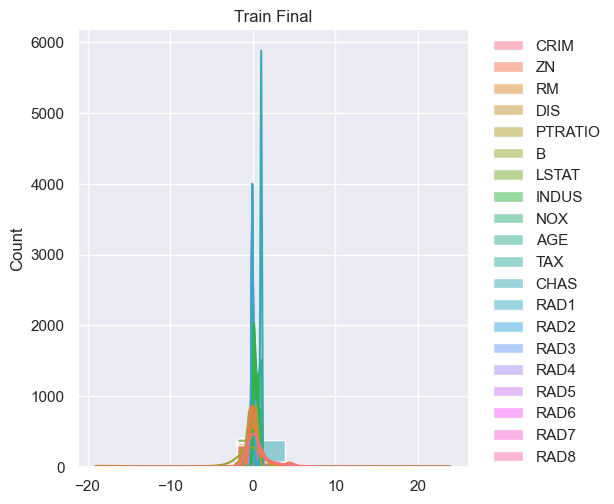

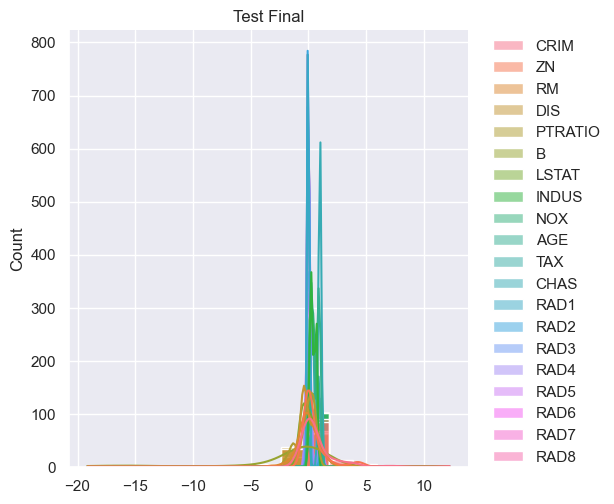

In [52]:
fig = plt.figure(figsize=(50,20))

sns.displot(X_train_final, kde=True, bins=15, ax=ax1)
plt.title('Train Final')

sns.displot(X_test_final, kde=True, bins=15, ax=ax2)
plt.title('Test Final')

plt.show()

Text(0.5, 1.0, 'X_test_final')

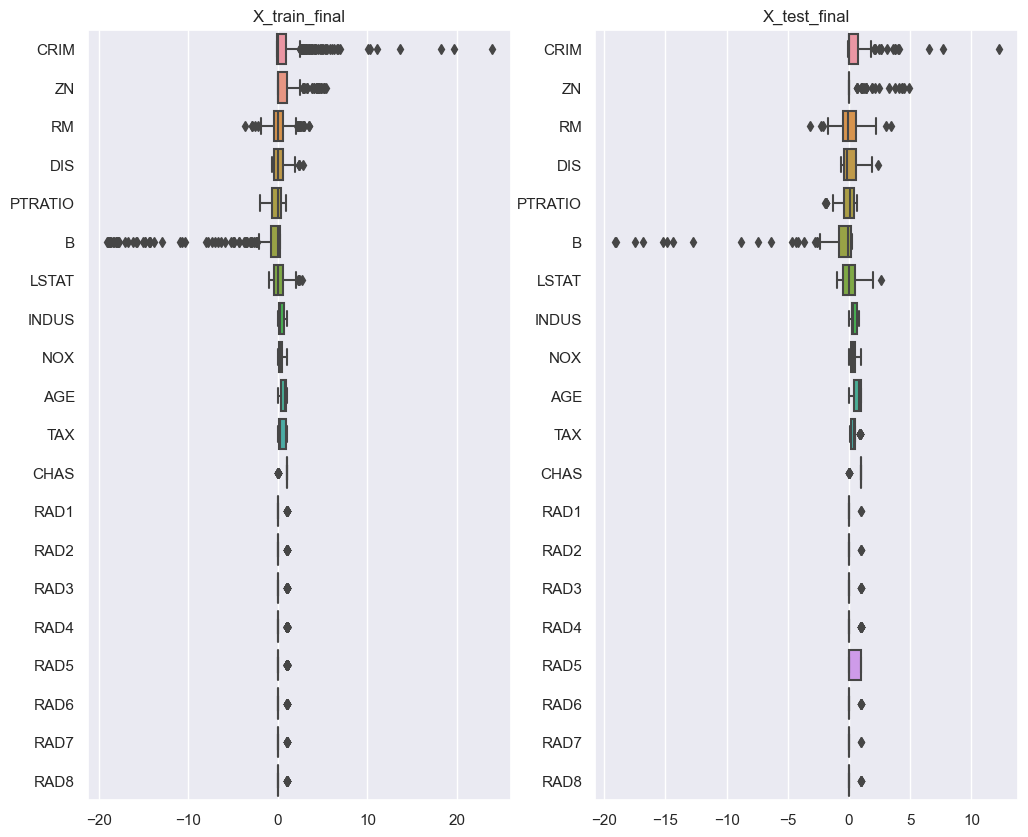

In [53]:
fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(1, 2, 1)
sns.boxplot(X_train_final, ax=ax1, orient = "h")
plt.title('X_train_final')

ax2 = fig.add_subplot(1, 2, 2)
sns.boxplot(X_test_final,ax=ax2, orient = "h")
plt.title('X_test_final')

> Las gráficas nos muestran que las distribuciones de los dataset _X_train_final_ y _X_test_final_ son muy similares y que las medias de todos los valores son coincidentes.